In [1]:
# HIDDEN
# The standard set of libraries we need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

# The standard library for data in tables
import pandas as pd

# A tiny function to read a file directly from a URL
from urllib.request import urlopen

def read_url(url):
    return urlopen(url).read().decode()

In [2]:
# HIDDEN
# Read the text of Pride and Prejudice, split into chapters.
book_url = 'http://www.gutenberg.org/ebooks/42671.txt.utf-8'
book_text = read_url(book_url)
# Break the text into Chapters
book_chapters = book_text.split('CHAPTER ')
# Drop the first "Chapter" - it's the Project Gutenberg header
book_chapters = book_chapters[1:]

[Pride and Prejudice](https://en.wikipedia.org/wiki/Pride_and_Prejudice) is
the story of five sisters: Jane, Elizabeth, Mary, Kitty and Lydia, and their
journey through the social life of the mid-17th century.  You may remember
that Elizabeth ends up marrying the dashing and aloof Mr Darcy, but along the
way, the feckless Lydia runs off with the equally feckless Mr Wickham, and the
slightly useless Mr Bingley wants to marry Jane, the most beautiful of the
sisters.

We can see when these characters appear in the book, by counting how many
times their names are mentioned in each chapter.

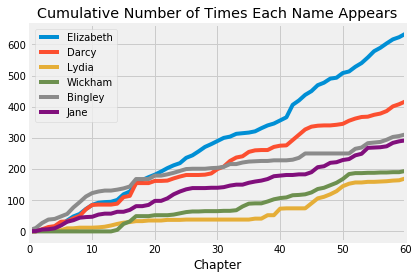

In [3]:
# Count how many times the characters appear in each chapter.
counts = pd.DataFrame.from_dict({
        'Elizabeth': np.char.count(book_chapters, 'Elizabeth'),
        'Darcy': np.char.count(book_chapters, 'Darcy'),
        'Lydia': np.char.count(book_chapters, 'Lydia'),
        'Wickham': np.char.count(book_chapters, 'Wickham'),
        'Bingley': np.char.count(book_chapters, 'Bingley'),
        'Jane': np.char.count(book_chapters, 'Jane')},
    )

# The cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
cum_counts = counts.cumsum()

# Add the chapter numbers
number_of_chapters = len(book_chapters)
cum_counts['Chapter'] = np.arange(number_of_chapters)

# Do the plot
cum_counts.plot(x='Chapter')
plt.title('Cumulative Number of Times Each Name Appears');

In the plot above, the horizontal axis shows chapter numbers and the vertical
axis shows how many times each character has been mentioned up to and
including that chapter.

Notice first that Elizabeth and Darcy are the main characters.  Around chapter
13 we see Wickham and Lydia spike up, as they run away together, and mentions
of Darcy flatten off, when he goes to look for them.   Around chapter 50 we see
Jane and Bingley being mentioned at a very similar rate, as Bingley proposes,
and Jane accepts.

{% data8page Literary_Characters %}